# **Bike Store Sales**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading Data


The read_csv function in the Pandas library is a function used when reading a CSV file. The parse_dates parameter is part of this function and is set to False by default. This parameter determines whether columns containing datetime information are converted to datetime objects.

If parse_dates is set to True, the read_csv function will automatically convert the date-time columns into Python's datetime objects. This allows you to more easily manipulate the datetime data in your dataset.

We can also pass column indices or the names of the datetime columns as a list/tuple to the parse_dates parameter. This can be useful when you only want to process certain columns as date-time. If a column name or column index is passed to the parse_dates parameter, this indicates that the specified column contains date-time information. Pandas will automatically convert this column in the dataset into date-time objects.


In [3]:
sales = pd.read_csv('/content/drive/MyDrive/DATASETS/sales_data.csv', parse_dates=['Date'])

The data at a glance:

In [5]:
sales.head() # If not writing argument, show first 5 rows

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [6]:
sales.shape

(113036, 18)

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [ ]:
sales.describe()

,Date,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,2014-11-23 12:14:55.063519232,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
min,2011-01-01 00:00:00,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,2013-12-22 00:00:00,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,2014-06-27 00:00:00,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,2016-01-09 00:00:00,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,2016-07-31 00:00:00,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000
std,NaN,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674


## Numerical Analysis and Visualization
Let's we analyze the Unit_cost column:

In [ ]:
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [ ]:
sales['Unit_Cost'].mean()

267.296365759581

In [ ]:
sales['Unit_Cost'].median()

9.0

<Axes: >

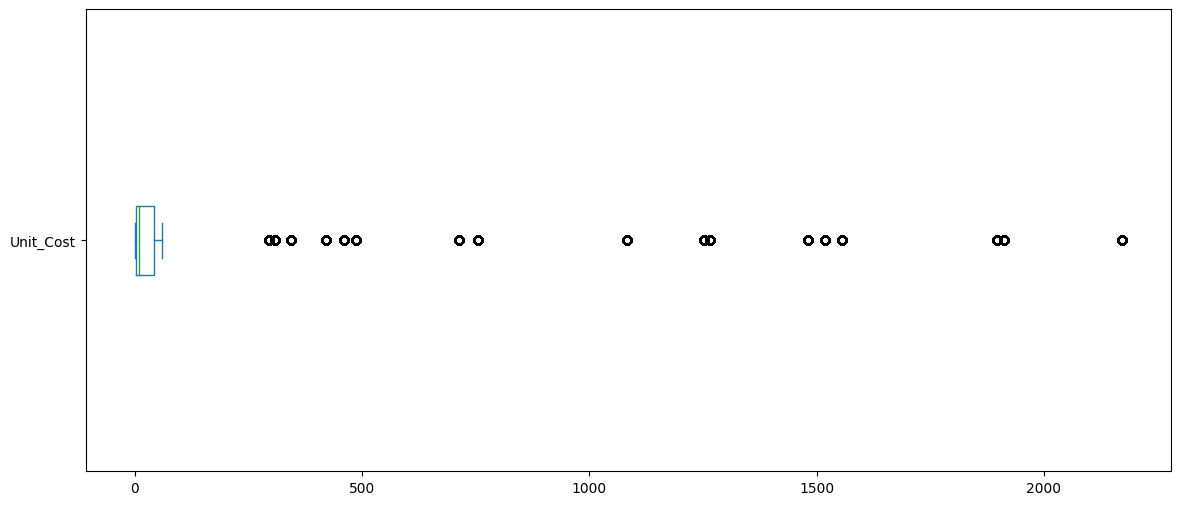

In [ ]:
sales['Unit_Cost'].plot(kind='box', vert=False, figsize=(14,6))

<Axes: ylabel='Density'>

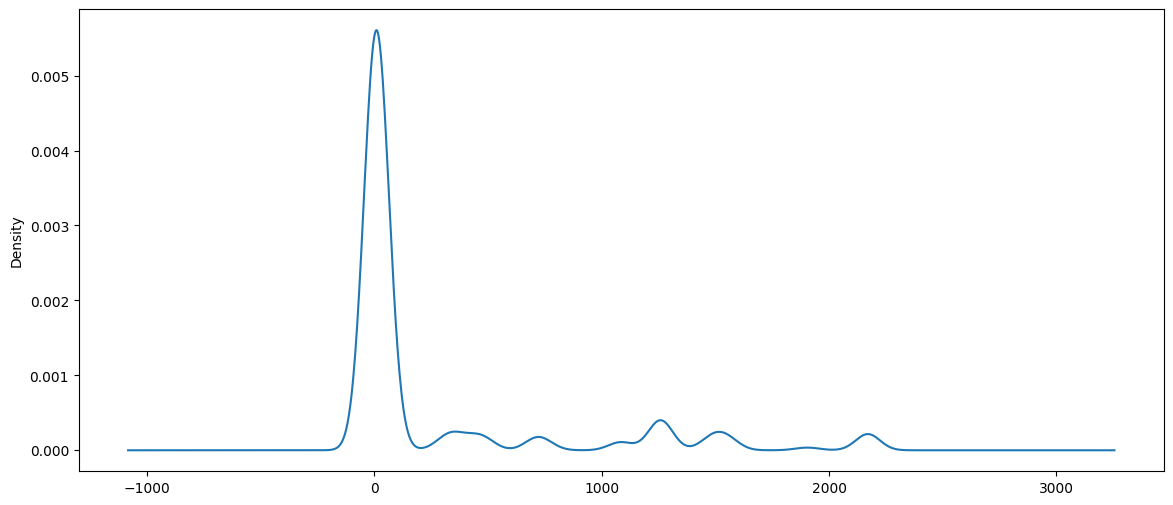

In [ ]:
sales['Unit_Cost'].plot(kind='density', figsize=(14,6))

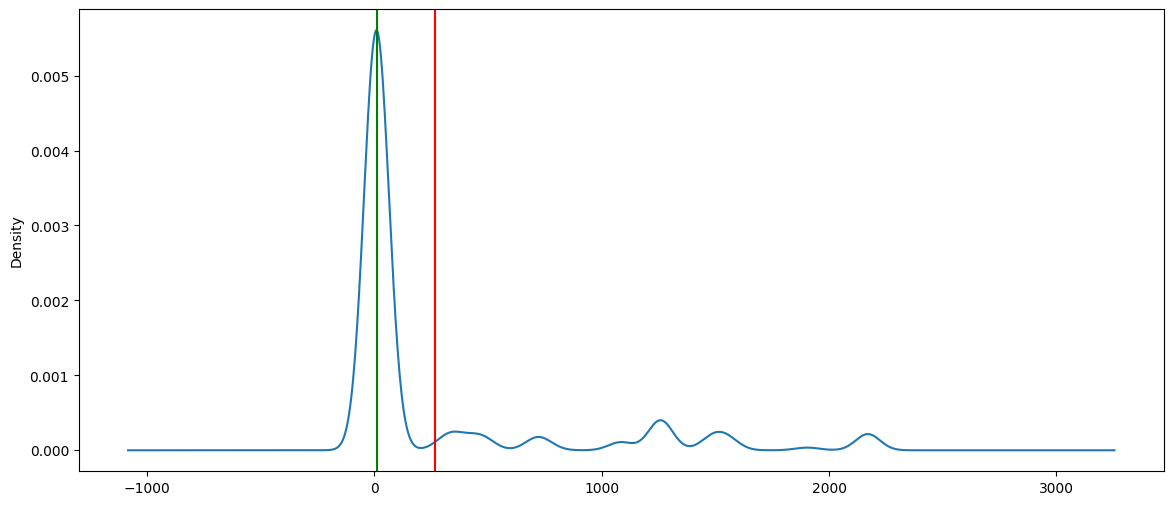

In [ ]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(14,6))
ax.axvline(sales['Unit_Cost'].mean(), color='red')
ax.axvline(sales['Unit_Cost'].median(), color='green')

Text(0.5, 0, 'dollars')

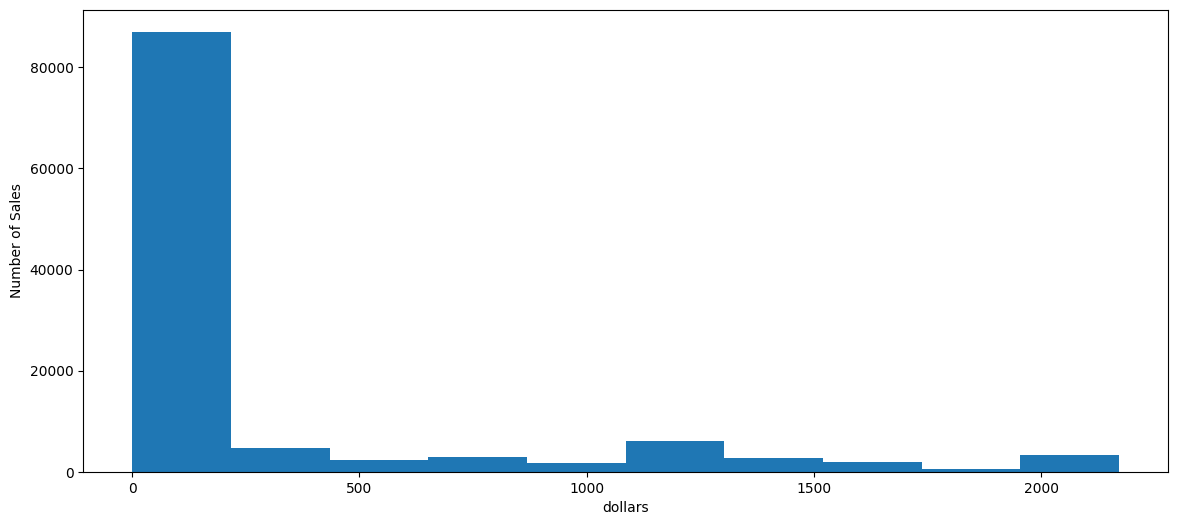

In [ ]:
ax = sales['Unit_Cost'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('dollars')

## Categorical analysis and visualization
Let's we analyze Age_Group column:

In [ ]:
sales['Age_Group'].value_counts()

Age_Group
Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: count, dtype: int64

<Axes: ylabel='count'>

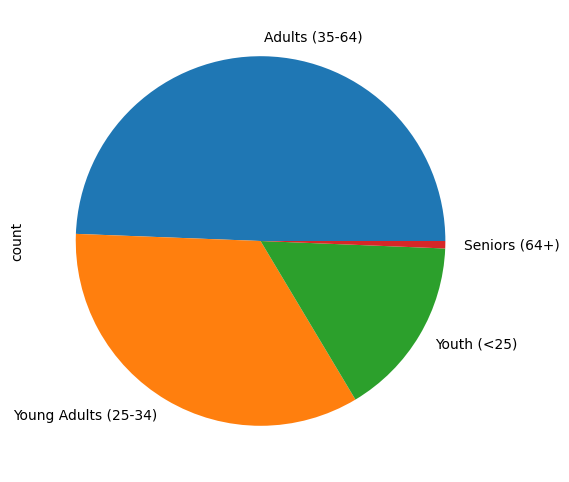

In [ ]:
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(6,6))

<Axes: xlabel='Age_Group'>

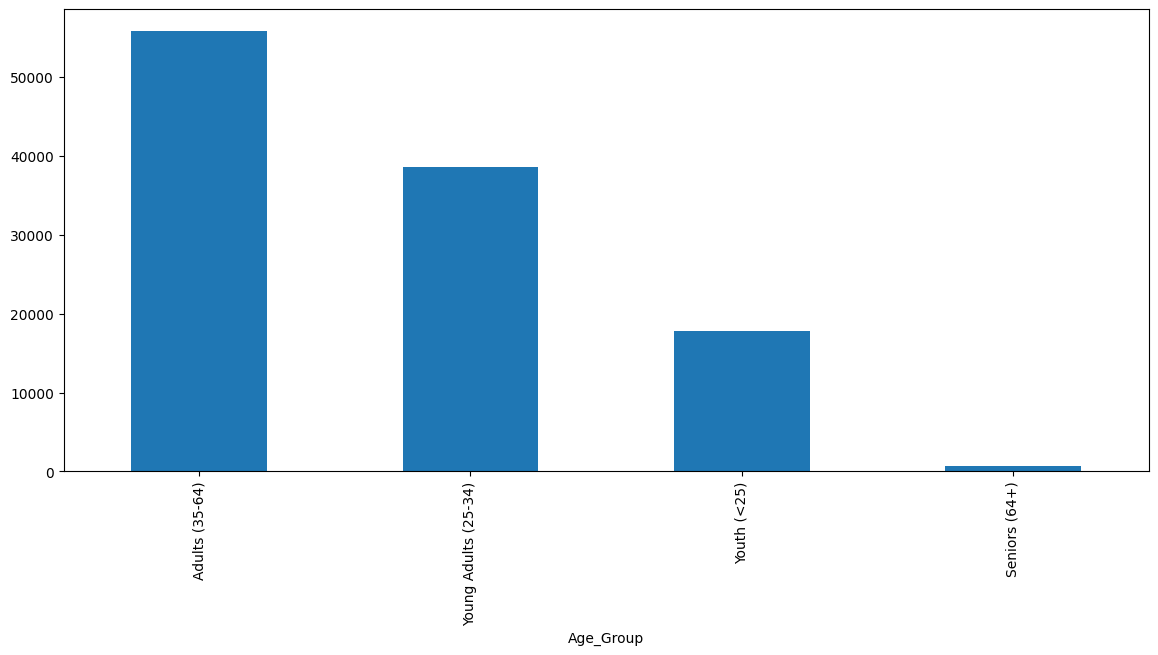

In [ ]:
sales['Age_Group'].value_counts().plot(kind='bar', figsize=(14,6))

## Relationship between the colums?

In [ ]:
corr = sales.corr()



ValueError: could not convert string to float: 'November'

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum = fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)

In [ ]:
sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6,6))

In [ ]:
sales.plot(kind='scatter', x='Revenue', y='Profit', figsize=(6,6))

In [ ]:
ax = sales[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10,6))
ax.set_ylabel('Profit')

In [ ]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']

sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

## Column wrangling

Add and calculate a new Revenue_per_Age column

In [7]:
sales['Revenue_per_Age'] = sales['Revenue'] / sales['Customer_Age']

sales['Revenue_per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

<Axes: ylabel='Density'>

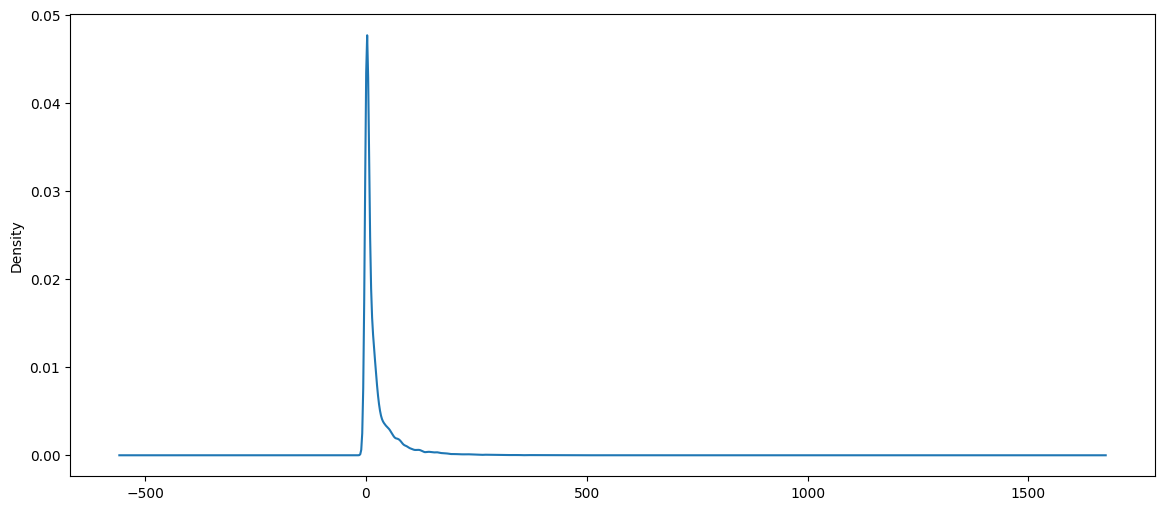

In [8]:
sales['Revenue_per_Age'].plot(kind='density', figsize=(14,6))

<Axes: ylabel='Frequency'>

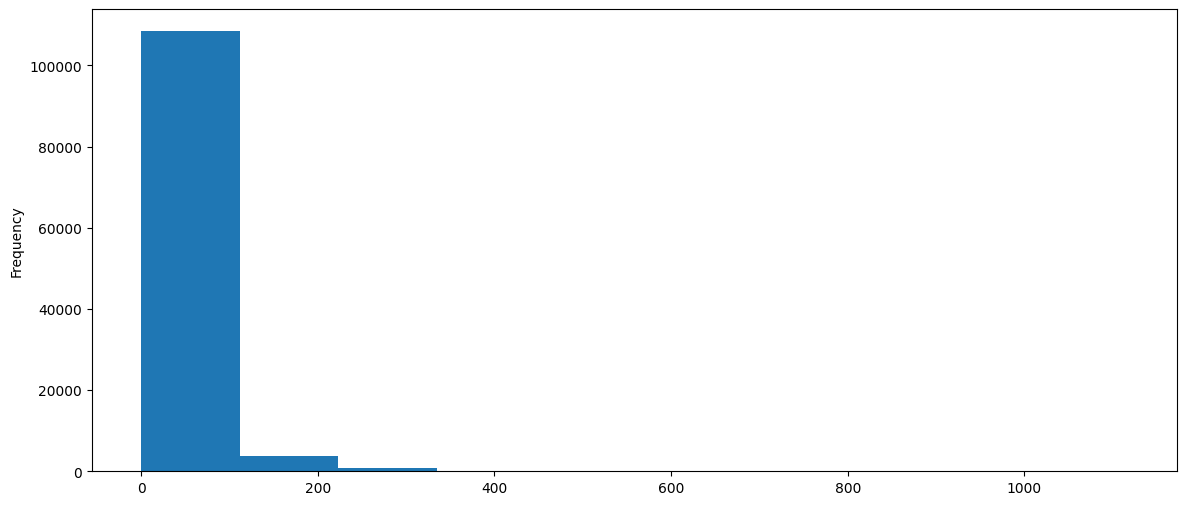

In [9]:
sales['Revenue_per_Age'].plot(kind='hist', figsize=(14,6))

And calculate a new Calculated_Cost Column. Formula:
Calculated_Cost = Order_Quantity * Unit_cost

In [10]:
sales['Calculated_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']

sales['Calculated_Cost'].head()

0     360
1     360
2    1035
3     900
4     180
Name: Calculated_Cost, dtype: int64

In [11]:
(sales['Calculated_Cost'] != sales['Cost']).sum()

0

we can see the relationship between Cost and Profit using a scatter plot:

<Axes: xlabel='Calculated_Cost', ylabel='Profit'>

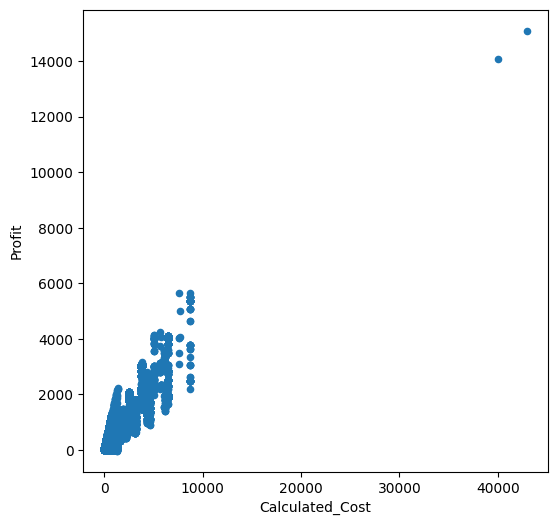

In [12]:
sales.plot(kind='scatter', x='Calculated_Cost', y='Profit', figsize=(6,6))

Add and calculate a new Calculated_Revenue column. Formula:
Calculated_Revenue Cost + Profit

In [13]:
sales['Calculated_Revenue'] = sales['Cost'] + sales['Profit']

sales['Calculated_Revenue'].head()

0     950
1     950
2    2401
3    2088
4     418
Name: Calculated_Revenue, dtype: int64

In [14]:
(sales['Calculated_Revenue'] != sales['Revenue']).sum()

0

In [15]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,49.000000,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,42.612245,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,...,Hitch Rack - 4-Bike,4,45,120,238,180,418,8.893617,180,418


<Axes: ylabel='Frequency'>

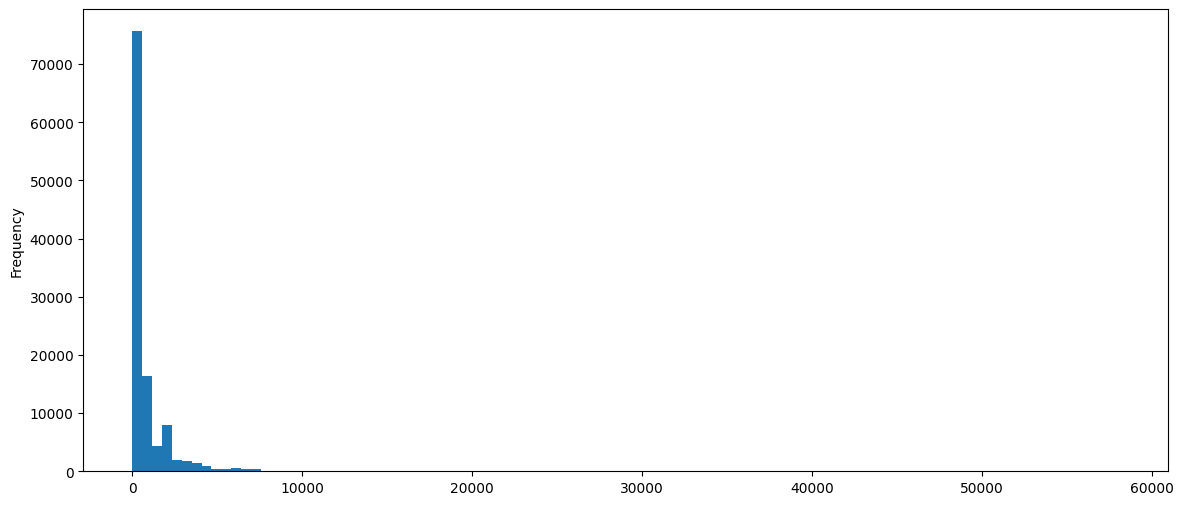

In [16]:
sales['Revenue'].plot(kind='hist', bins=100, figsize=(14,6))

Modify all Unit_Price values adding 3% tax to them

In [17]:
sales['Unit_Price'].head()

0    120
1    120
2    120
3    120
4    120
Name: Unit_Price, dtype: int64

In [18]:
# sales['Unit_Price] = sales['Unit_Price'] * 1.03
sales['Unit_Price'] *= 1.03

In [19]:
sales['Unit_Price'].head()

0    123.6
1    123.6
2    123.6
3    123.6
4    123.6
Name: Unit_Price, dtype: float64

## Selectin & Indexing

Get all the sales made in the state of Kentucky

In [20]:
sales.loc[sales['State'] == 'Kentucky'] # show state equal to Kentucky


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Hitch Rack - 4-Bike,1,45,123.60,63,45,108,2.700,45,108
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,12,8,22.66,142,96,238,5.950,96,238
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,Fender Set - Mountain,14,8,22.66,165,112,277,6.925,112,277
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",29,13,36.05,537,377,914,22.850,377,914
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,"Sport-100 Helmet, Blue",31,13,36.05,574,403,977,24.425,403,977
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,2,11,30.90,32,22,54,1.350,22,54
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,21,11,30.90,336,231,567,14.175,231,567
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,1,11,30.90,16,11,27,0.675,11,27
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,...,ML Mountain Tire,18,11,30.90,288,198,486,12.150,198,486


Get the mean revenue of the adults (35-64) sales group

In [21]:
sales.loc[sales['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

How many records belong to Age Group Youth (<25) or Adults (35,64)?

In [22]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35,64)')]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost,Calculated_Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,123.60,590,360,950,50.000000,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,...,Hitch Rack - 4-Bike,8,45,123.60,590,360,950,50.000000,360,950
54,2013-07-17,17,July,2013,24,Youth (<25),F,Australia,Queensland,Accessories,...,Hitch Rack - 4-Bike,9,45,123.60,502,405,907,37.791667,405,907
55,2015-07-17,17,July,2015,24,Youth (<25),F,Australia,Queensland,Accessories,...,Hitch Rack - 4-Bike,6,45,123.60,335,270,605,25.208333,270,605
56,2013-12-31,31,December,2013,23,Youth (<25),M,United States,California,Accessories,...,Hitch Rack - 4-Bike,6,45,123.60,436,270,706,30.695652,270,706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113015,2015-12-10,10,December,2015,20,Youth (<25),F,United States,Washington,Clothing,...,"Classic Vest, M",6,24,65.92,156,144,300,15.000000,144,300
113016,2013-10-04,4,October,2013,20,Youth (<25),M,United States,Oregon,Clothing,...,"Classic Vest, L",16,24,65.92,497,384,881,44.050000,384,881
113017,2015-10-04,4,October,2015,20,Youth (<25),M,United States,Oregon,Clothing,...,"Classic Vest, L",18,24,65.92,559,432,991,49.550000,432,991
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,...,"Classic Vest, M",22,24,65.92,655,528,1183,65.722222,528,1183


In [23]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35,64)')].shape

(17828, 21)

In [25]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35,64)')].shape[0] # we get number of rows

17828

Get the mean revenue of the sales group Adults (35-64) in United States

In [26]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)') & (sales['Country'] == 'United States'), 'Revenue']    #loc: show rows that have index in []

22         929
23         722
38        1176
39        1176
40        1294
          ... 
112959     499
112986     878
112987     878
112994    1756
112995    1568
Name: Revenue, Length: 21960, dtype: int64

In [27]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)') & (sales['Country'] == 'United States'), 'Revenue'] .mean()

726.7260473588342

Increase the revenue by %10 to every sale made in France

In [30]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     865.7
51     865.7
52    3252.7
53    3136.1
60     688.6
Name: Revenue, dtype: float64

In [31]:
# sales.loc[sales['Country] == 'France', Revenue] * 1.1  #show revenue columns of rows that have index in []
sales.loc[sales['Country'] == 'France', 'Revenue'] *= 1.1

In [32]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head().to_frame()

,Revenue
50,952.27
51,952.27
52,3577.97
53,3449.71
60,757.46


#**The Sakila Database**
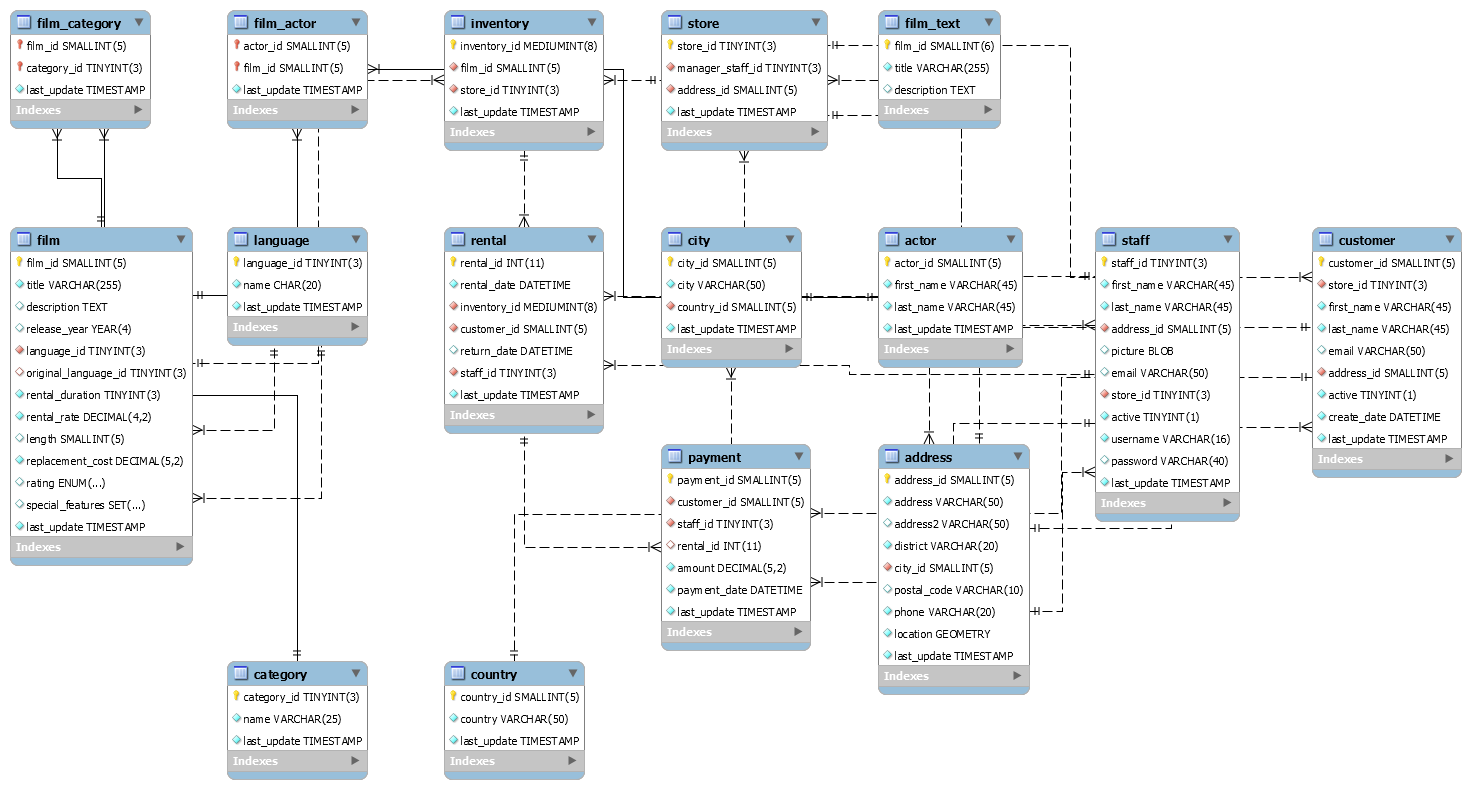

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline


The %matplotlib inline command is a directive in Python used specifically in Jupyter Notebooks or IPython environments. When you execute this command, it tells the notebook interface to display Matplotlib plots directly within the notebook, rather than in a separate window or file.

This is particularly useful for data visualization and analysis tasks where you want to see the plots alongside your code and analysis. It enhances the interactivity and readability of your notebooks, making it easier to understand the relationships between your code, data, and visualizations.

In Google Colab, you don't necessarily need to use %matplotlib inline because it already configures Matplotlib to display plots inline by default. When you import Matplotlib in a Google Colab notebook and create a plot, it will automatically be displayed directly below the cell that generated it.

However, it's still common to see %matplotlib inline being used in Colab notebooks out of habit or for compatibility with other environments. While it won't have any negative effects if you include it, it's technically redundant in a Google Colab environment.

pd.read_sql https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html


In [36]:
# Loading data
conn = sqlite3.connect('/content/drive/MyDrive/DATASETS/Patika - Veri Analizi Patikası - Veri Analizine Giriş/sakila.db')

df = pd.read_sql('''  SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_last_name,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title,
        film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate,
        film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
        FROM rental
        INNER JOIN customer ON rental.customer_id = customer.customer_id,
        INNER JOIN inventory ON rental.inventory_id = inventory.inventory_id,
        INNER JOIN store ON inventory.store_id = store.store_id,
        INNER JOIN address ON store.address_id = address.address_id,
        INNER JOIN city ON address.city_id = city.city_id,
        INNER JOIN film ON inventory.film_id = film.film_id
        ;
        ''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

DatabaseError: Execution failed on sql '  SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_last_name,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title,
        film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate,
        film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
        FROM rental
        INNER JOIN customer ON rental.customer_id = customer.customer_id,
        INNER JOIN inventory ON rental.inventory_id = inventory.inventory_id,
        INNER JOIN store ON inventory.store_id = store.store_id,
        INNER JOIN address ON store.address_id = address.address_id,
        INNER JOIN city ON address.city_id = city.city_id,
        INNER JOIN film ON inventory.film_id = film.film_id
        ;
        ': no such table: INNER

In [2]:
# Loading data
conn = sqlite3.connect('/content/drive/MyDrive/DATASETS/Patika - Veri Analizi Patikası - Veri Analizine Giriş/sakila.db')

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

The data at a glance:

In [3]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


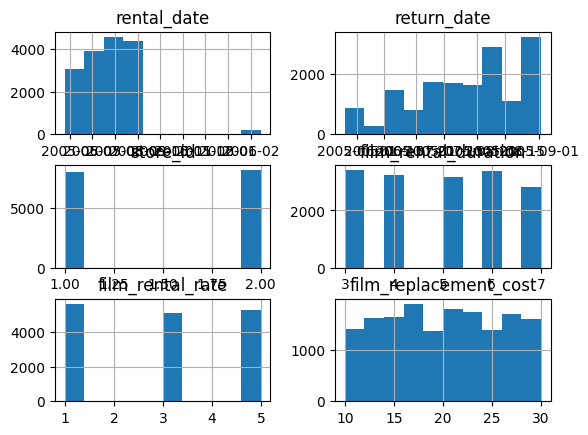

In [4]:
# prompt: df veri çerçevesi kullanılıyor: hist

import matplotlib.pyplot as plt
df.hist()
plt.show()


In [5]:
df.shape

(16044, 10)

In [6]:
type(df.shape)

tuple

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  object        
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   film_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.9+ MB


In [10]:
df.describe()

,rental_date,return_date,store_id,film_rental_duration,film_rental_rate,film_replacement_cost
count,16044,15861,16044.000000,16044.00000,16044.000000,16044.000000
mean,2005-07-23 08:12:53.217526912,2005-07-25 23:58:03.138768128,1.506171,4.93549,2.942630,20.215443
min,2005-05-24 22:53:30,2005-05-25 23:55:21,1.000000,3.00000,0.990000,9.990000
25%,2005-07-07 00:58:40.500000,2005-07-10 15:49:36,1.000000,4.00000,0.990000,14.990000
50%,2005-07-28 16:04:32.500000,2005-08-01 19:45:29,2.000000,5.00000,2.990000,20.990000
75%,2005-08-17 21:16:23,2005-08-20 23:35:55,2.000000,6.00000,4.990000,25.990000
max,2006-02-14 15:16:03,2005-09-02 02:35:22,2.000000,7.00000,4.990000,29.990000
std,NaN,NaN,0.499978,1.40169,1.649678,6.081771


**Numerical analysis and visualization**
Let's we analyze Film_rental_rate column:

In [11]:
df['film_rental_rate'].describe()

count    16044.000000
mean         2.942630
std          1.649678
min          0.990000
25%          0.990000
50%          2.990000
75%          4.990000
max          4.990000
Name: film_rental_rate, dtype: float64

In [12]:
df['film_rental_rate'].mean()

2.9426302667663933

In [13]:
df['film_rental_rate'].median()

2.99

<Axes: >

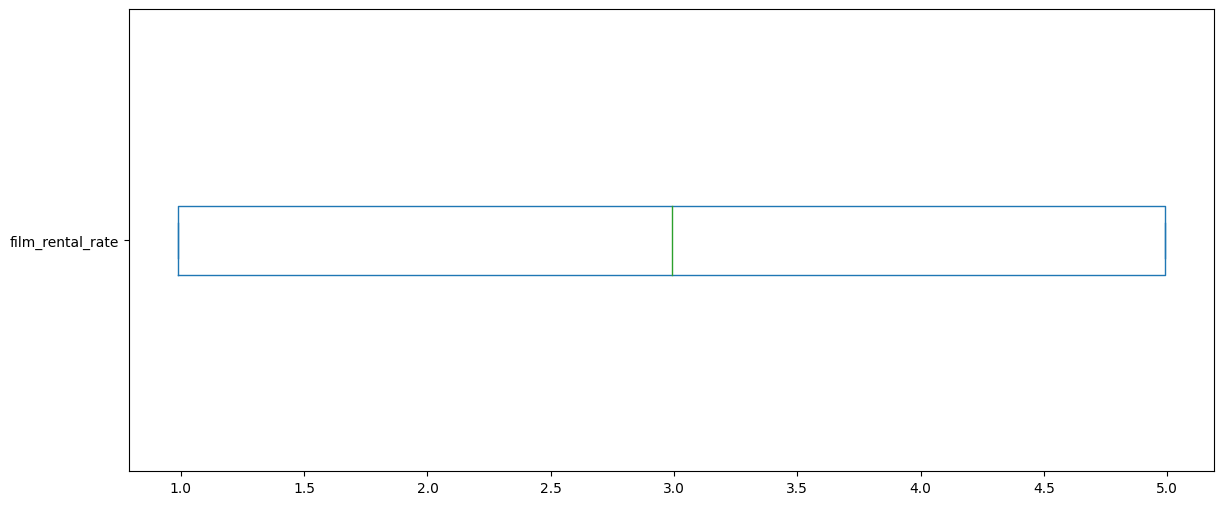

In [14]:
df['film_rental_rate'].plot(kind='box', vert=False, figsize=(14,6))

<Axes: ylabel='Density'>

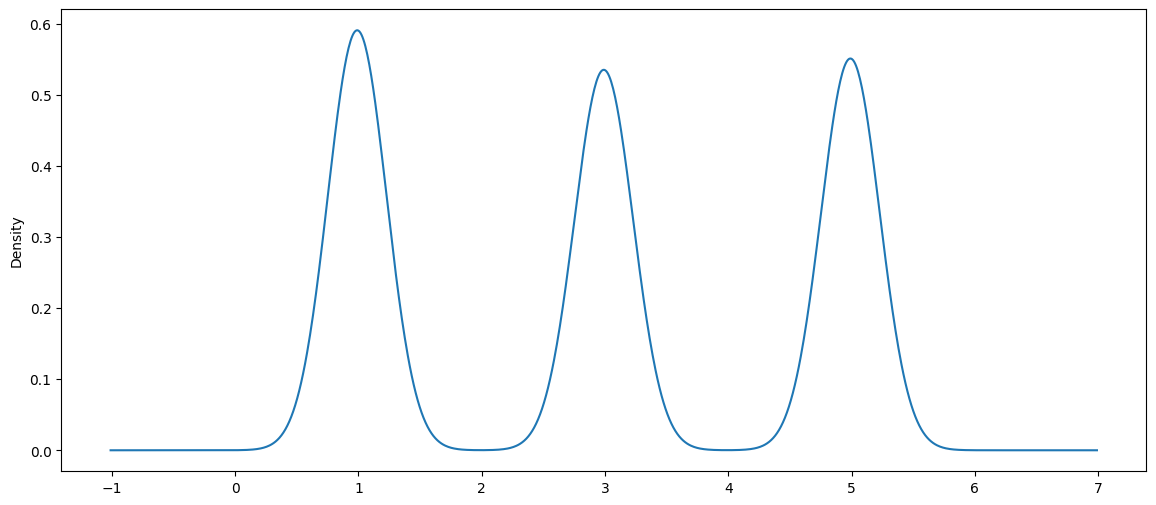

In [18]:
df['film_rental_rate'].plot(kind='density', figsize=(14, 6)) # kde

Text(0, 0.5, 'Number of Rentals')

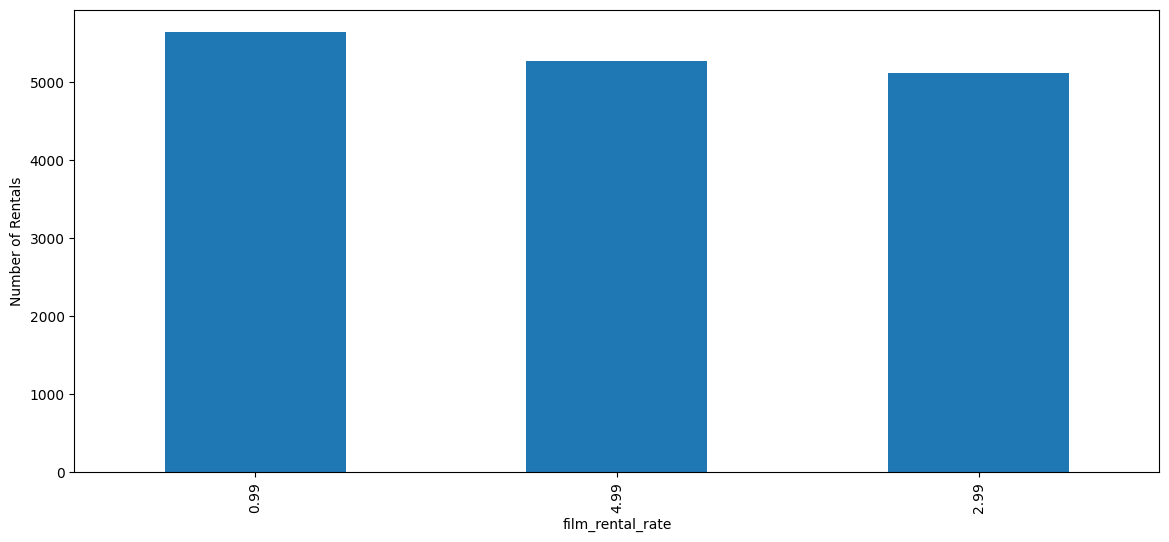

In [19]:
ax = df['film_rental_rate'].value_counts().plot(kind='bar', figsize=(14, 6))
ax.set_ylabel('Number of Rentals')

**Categorical analysis and visualization**
Let's we analyze rental_store_city column:

In [20]:
df['rental_store_city'].value_counts()

rental_store_city
Woodridge     8121
Lethbridge    7923
Name: count, dtype: int64

<Axes: ylabel='count'>

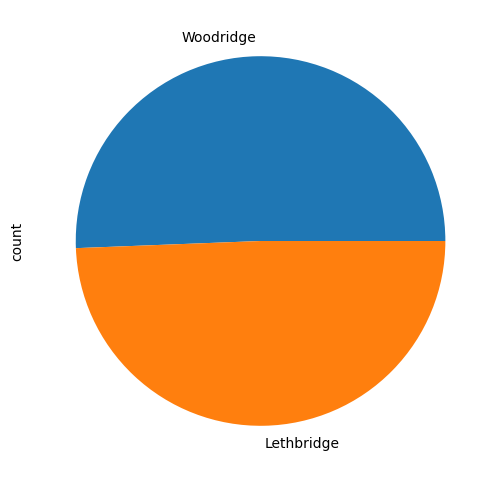

In [21]:
df['rental_store_city'].value_counts().plot(kind='pie', figsize=(6,6))

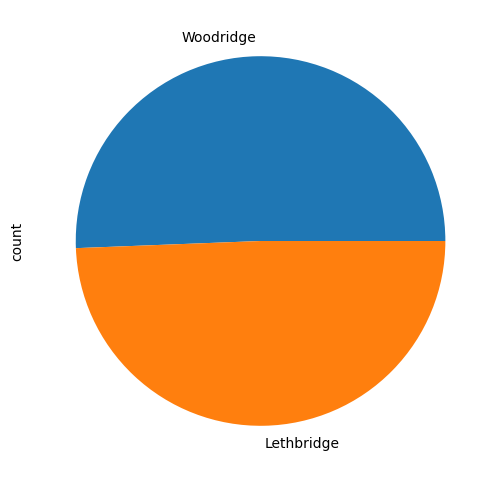

In [22]:
ax = df['rental_store_city'].value_counts().plot(kind='pie', figsize=(6, 6))
ax.set_ylabel('Number of rentals')

Text(0, 0.5, 'Number of rentals')

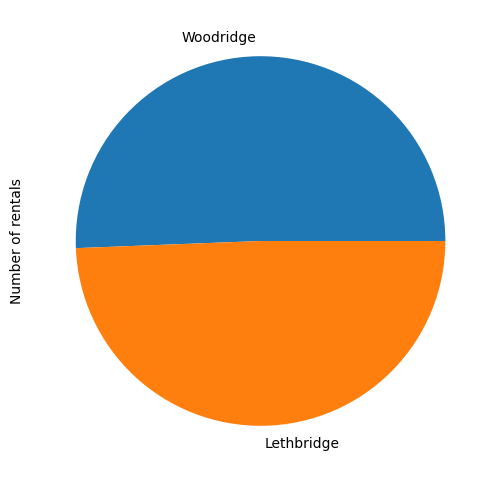

In [23]:
ax = df['rental_store_city'].value_counts().plot(kind='pie', figsize=(6, 6))
ax.set_ylabel('Number of rentals')

Text(0, 0.5, 'Number of rentals')

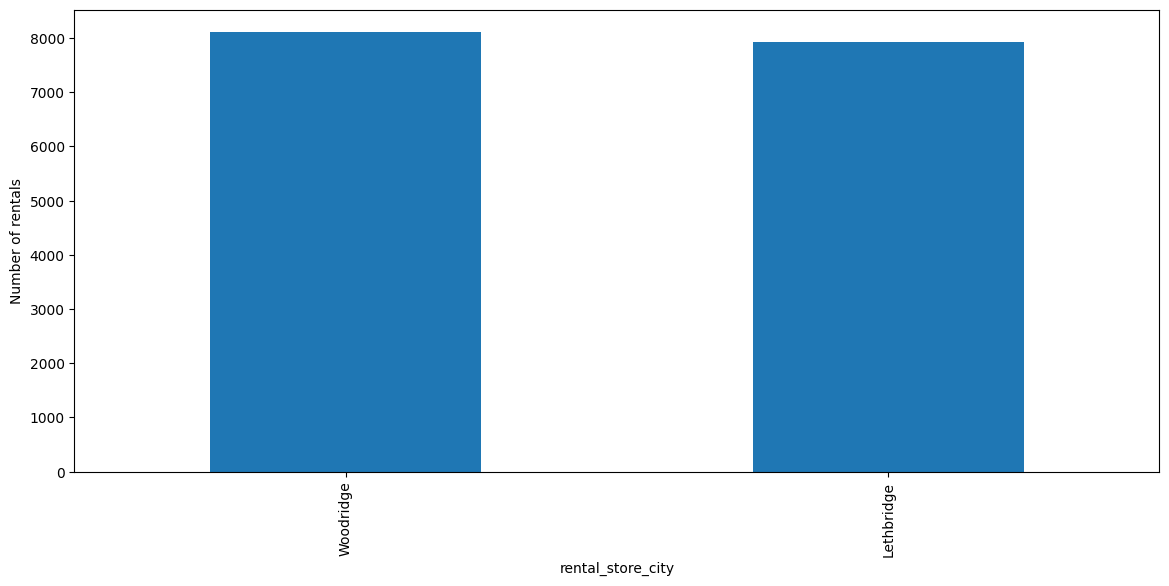

In [24]:
ax = df['rental_store_city'].value_counts().plot(kind='bar', figsize=(14, 6))
ax.set_ylabel('Number of rentals')

"Wrangling" genellikle veri işleme ve düzenleme anlamına gelir. Özellikle veri bilimi ve veri analizi alanlarında kullanılır. Veri "wrangling"i, veri kaynağından elde edilen ham veriyi temizleme, dönüştürme ve formatlama sürecini ifade eder. Bu süreç, veriyi analiz veya makine öğrenimi modellerine uygun hale getirerek veri bilimcilerinin veya analistlerin daha iyi anlayabileceği, işleyebileceği ve kullanabileceği bir forma dönüştürme işlemidir. Bu, eksik veya yanlış verilerin düzeltilmesini, veri türlerinin dönüştürülmesini, gereksiz bilgilerin kaldırılmasını ve veri setlerinin birleştirilmesini içerebilir.

**Column Wrangling**

Add and calculate a new rental_rate_return column. Formula:

rental_gain_return = 100 * film_rental_rate / film_replacement_cost

In [26]:
df['rental_gain_return'] = 100 * df['film_rental_rate'] / df['film_replacement_cost']

df['rental_gain_return'].head().to_frame()

,rental_gain_return
rental_id,
1,13.597090
2,17.598587
3,19.946631
4,4.502046
5,9.969990


<Axes: ylabel='Density'>

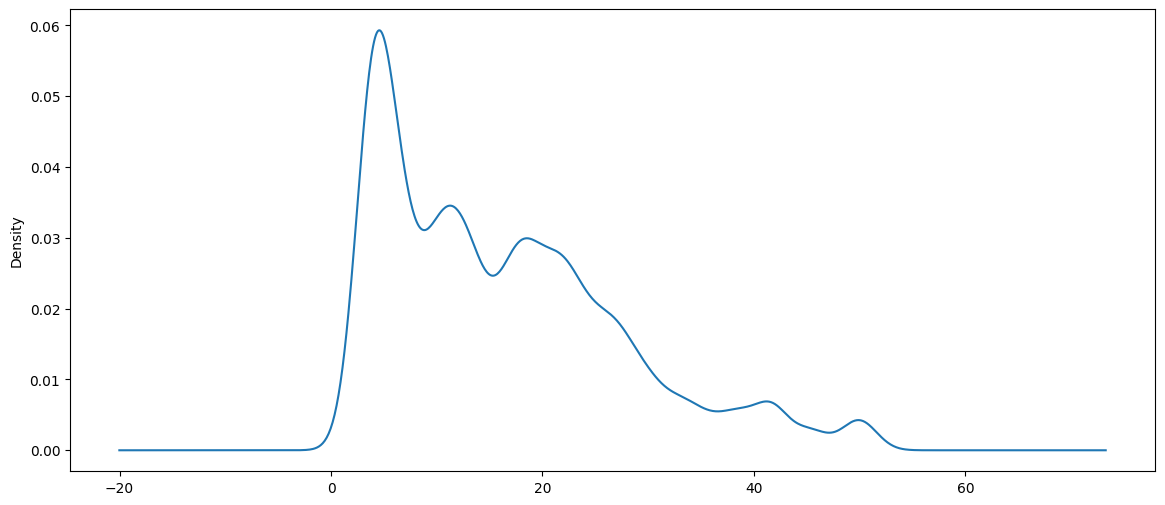

In [27]:
df['rental_gain_return'].plot(kind='density', figsize=(14, 6))

In [34]:
df['rental_gain_return'].mean().round(2) # a.xcvbnm.....   round= number of after '.'. in the same time, if return value for round(2) a.x9, return a.(x+1)

16.34

In [38]:
df['rental_gain_return'].median().round(2)

13.6

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html

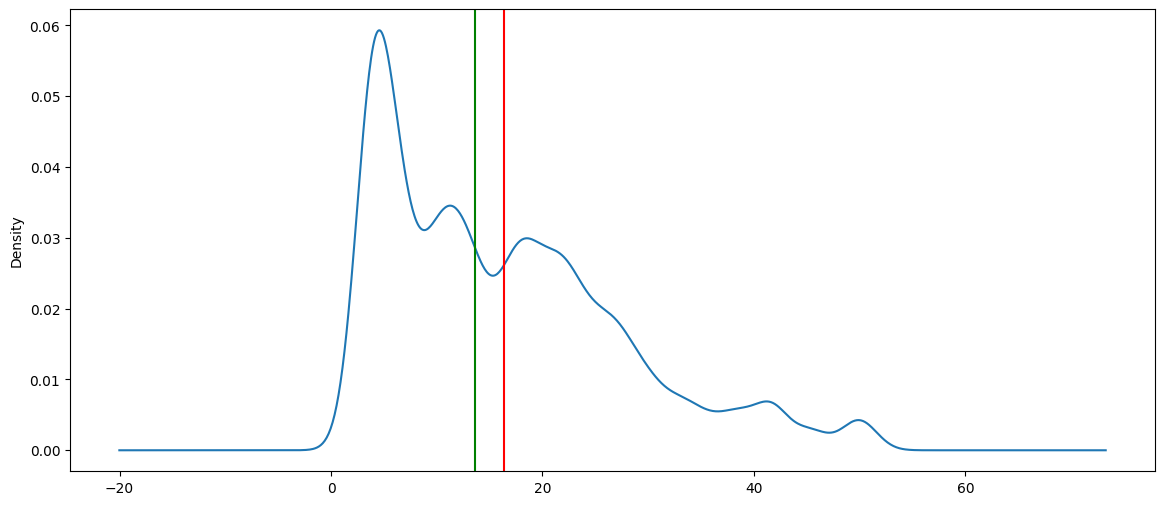

In [39]:
ax = df['rental_gain_return'].plot(kind='density', figsize=(14, 6))
ax.axvline(df['rental_gain_return'].mean(), color='red')
ax.axvline(df['rental_gain_return'].median(), color='green')





> Each rental represents 13.6% of film cost

So 7.35 rentals are needed to recover film market price (film_replacement_cost)





In [41]:
100 / 13.6

7.352941176470589

while in average each film is rented 16.74 times

In [42]:
df['film_title'].value_counts().mean()

16.747390396659707

##Selection & Indexing

Get the rental records of the customer with lastname HANSEN

In [43]:
df.loc[df['customer_lastname'] == 'HANSEN']

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_gain_return
rental_id,,,,,,,,,,,
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17,9.969990
134,2005-05-25 21:48:41,2005-06-02 18:28:41,HANSEN,2,Woodridge,JUMPING WRATH,4,0.99,18.99,NC-17,5.213270
416,2005-05-27 15:02:10,2005-05-29 10:34:10,HANSEN,2,Woodridge,LESSON CLEOPATRA,3,0.99,28.99,NC-17,3.414971
809,2005-05-29 19:10:20,2005-06-05 19:05:20,HANSEN,2,Woodridge,INDIAN LOVE,4,0.99,26.99,NC-17,3.668025
1006,2005-05-31 00:57:08,2005-06-02 22:35:08,HANSEN,2,Woodridge,SALUTE APOLLO,4,2.99,29.99,R,9.969990
1368,2005-06-15 14:27:47,2005-06-23 18:07:47,HANSEN,1,Lethbridge,HUNCHBACK IMPOSSIBLE,4,4.99,28.99,PG-13,17.212832
2603,2005-06-19 06:21:25,2005-06-26 03:19:25,HANSEN,2,Woodridge,CAT CONEHEADS,5,4.99,14.99,G,33.288859
5209,2005-07-09 11:22:39,2005-07-17 09:31:39,HANSEN,1,Lethbridge,WHALE BIKINI,4,4.99,11.99,PG-13,41.618015
5266,2005-07-09 14:17:40,2005-07-16 10:42:40,HANSEN,2,Woodridge,LOATHING LEGALLY,4,0.99,29.99,R,3.301100


Create a list of all the films with the highest replacement cost

In [44]:
df['film_replacement_cost'].max()

29.99

In [45]:
df.loc[df['film_replacement_cost'] == df['film_replacement_cost'].max(), 'film_title'] # df.loc[a, b] => a=rows, b=column

rental_id
5         IDOLS SNATCHERS
8          LAWLESS VISION
30            SONG HEDWIG
71       LOATHING LEGALLY
76         PATIENT SISTER
               ...       
15987    POSEIDON FOREVER
15991     IDOLS SNATCHERS
15992        RIVER OUTLAW
16036       FANTASIA PARK
16044      EVERYONE CRAFT
Name: film_title, Length: 868, dtype: object

In [46]:
df.loc[df['film_replacement_cost'] == df['film_replacement_cost'].max(), 'film_title'].unique()

array(['IDOLS SNATCHERS', 'LAWLESS VISION', 'SONG HEDWIG',
       'LOATHING LEGALLY', 'PATIENT SISTER', 'RESERVOIR ADAPTATION',
       'JEEPERS WEDDING', 'GOLDFINGER SENSIBILITY', 'CHARIOTS CONSPIRACY',
       'HONEY TIES', 'GRAFFITI LOVE', 'SLACKER LIAISONS', 'DIRTY ACE',
       'BLINDNESS GUN', 'WYOMING STORM', 'FEUD FROGMEN', 'SALUTE APOLLO',
       'JINGLE SAGEBRUSH', 'HILLS NEIGHBORS', 'UNCUT SUICIDES',
       'EVERYONE CRAFT', 'FLATLINERS KILLER', 'BALLROOM MOCKINGBIRD',
       'RIVER OUTLAW', 'ARABIA DOGMA', 'VIRGIN DAISY', 'JERICHO MULAN',
       'SASSY PACKER', 'TRACY CIDER', 'LOVER TRUMAN', 'DOCTOR GRAIL',
       'GILMORE BOILED', 'PRINCESS GIANT', 'CRUELTY UNFORGIVEN',
       'REIGN GENTLEMEN', 'WEST LION', 'BONNIE HOLOCAUST', 'EARTH VISION',
       'RANDOM GO', 'CLOCKWORK PARADISE', 'FANTASIA PARK', 'RIGHT CRANES',
       'CUPBOARD SINNERS', 'OSCAR GOLD', 'SMILE EARRING',
       'HOLLYWOOD ANONYMOUS', 'POSEIDON FOREVER',
       'EXTRAORDINARY CONQUERER', 'QUEST MUSSOLINI', 

How many PG or PG-13 rating films were rented?

In [47]:
df.loc[(df['film_rating'] == 'PG') | (df['film_rating'] == 'PG-13')].shape[0]

6797